# Defining the CIA class

In NEMESIS, the information about the collision-induced absorption (CIA) cross sections is stored in a binary file whose name is listed in the input *.cia* file. In particular, it includes the CIA cross sections for a limited number of pairs that are mostly relevant for the gas and ice giant planets. In particular, it lists the cross sections for H$_2$-H$_2$ (equilibrium), H$_2$-He (equilibrium), H$_2$-H$_2$ (normal), H$_2$-He (normal), H$_2$-N$_2$, N$_2$-CH$_4$, N$_2$-N$_2$, CH$_4$, CH$_4$, H$_2$-CH$_4$. These tables can also be read with archNEMESIS automatically by using the function CIA_0.*read_cia()* within the CIA class.

In archNEMESIS, while we can read the files used for running NEMESIS retrievals, we also include a new format of these versions to allow for a bigger variety of CIA pairs. In particular, rather than tabulating the cross sections for a pre-defined list of pairs, we specify in the table the ID and ISO identifiers of the involved gases. That way, we can specify the cross sections for any arbitrary pair of gases.

In this notebook, we are going to show how we can use the routines in archNEMESIS to read the *.cia* file from a NEMESIS run, and convert it to the most updated HDF5 CIA tables supported by archNEMESIS.

In [1]:
import archnemesis as ans
import numpy as np
import matplotlib.pyplot as plt
import os

## 1. Reading the binary CIA tables from NEMESIS

In this section, we first read the CIA tables using the NEMESIS format and store the information within the CIA class of archNEMESIS.

It must be noted that the units of the CIA tables in the NEMESIS format are defined in cm$^{-1}$ amagat$^{-2}$, while the units of the cross sections in the CIA class of archNEMESIS are in cm$^{5}$ molecule$^{-2}$. This unit conversion is automatically applied when reading the CIA tables from the standard NEMESIS CIA tables, following the definition of the amagat unit, 1 $A$ = 2.6867811 $\times$ 10$^{25}$ molecules m$^{-3}$.

Wavelength range ::  0.0 15000.0 cm-1
Temperature range ::  50.0 170.0 K
Number of CIA pairs ::  9
Pairs included in CIA class :: 
H2-H2
H2-He
H2-H2 ('normal')
H2-He ('normal')
H2-N2
N2-CH4
N2-N2
CH4-CH4
H2-CH4


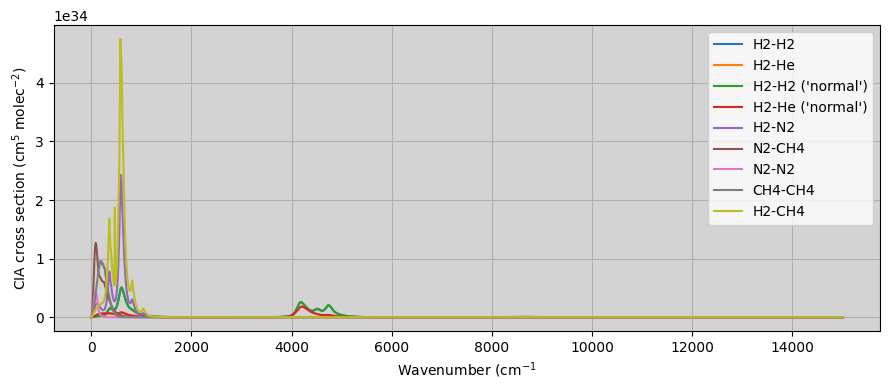

In [2]:
#Reading the .cia file
##########################################

CIA = ans.CIA_0(runname='neptune')
CIA.read_cia()

#Printing summary information to screen
###########################################

CIA.summary_info()

#Making summary plot with the cross sections
##############################################

CIA.plot_cia()

## 2. Writing a CIA table in the archNEMESIS HDF5 format

Once we have read the CIA tables from NEMESIS, we can directly write the CIA tables into the HDF5 file supported by archNEMESIS. The units of the CIA cross sections in the HDF5 file are the same as in the CIA class (cm$^{5}$ molecule$^{-2}$).

The information that is stored in the HDF5 CIA tables includes:

- *NPAIR*: Number of CIA pairs included in the look-up table
- *NWAVE*: Number of wavenumber points in the look-up table
- *NT*: Number of temperatures at which the CIA cross sections are tabulated
- *IPAIRG1* and *IPAIRG2*: ID of the gases for each CIA pair (e.g., N2-CO2; IPAIRG1 = N2 = 22, IPAIRG2 = CO2 = 2)
- *INORMALT*: Flag indicating whether the cross sections correspond to equilibrium or normal hydrogen
- *WAVEN*: Wavenumber array (cm$^{-1}$)
- *TEMP*: Temperature (K)
- *K_CIA*: CIA cross sections (cm$^{5}$ molecule$^{-2}$)

In [3]:
#Writing the information about the CIA tables into an HDF5 table
CIA.write_ciatable_hdf5('example')

## 3. Reading the information from the CIA HDF5 tables

In this case, instead of reading the information from the CIA table listed in the *.cia* file, we read the information from the HDF5 table supported by archNEMESIS. 

Wavelength range ::  0.0 15000.0 cm-1
Temperature range ::  50.0 170.0 K
Number of CIA pairs ::  9
Pairs included in CIA class :: 
H2-H2
H2-He
H2-H2 ('normal')
H2-He ('normal')
H2-N2
N2-CH4
N2-N2
CH4-CH4
H2-CH4


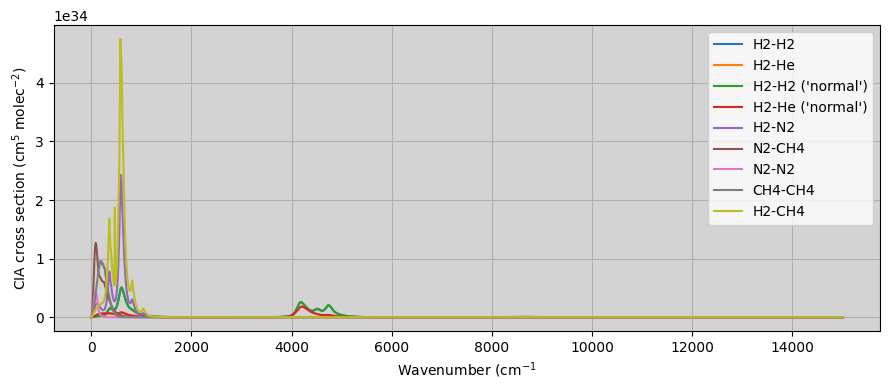

In [4]:
#Initialising the CIA class
########################################

CIA = ans.CIA_0()

CIA.CIADATA = os.getcwd()   #Path where the CIA table is stored (Default is /Data/cia/)
CIA.CIATABLE = 'example.h5' #Name of the CIA HDF5 table

#Reading the CIA table
#########################################

CIA.read_ciatable_hdf5(CIA.CIADATA+'/'+CIA.CIATABLE)


#Printing summary information to screen
###########################################

CIA.summary_info()

#Making summary plot with the cross sections
##############################################

CIA.plot_cia()

## 4. Reading/writing the information from an archNEMESIS HDF5 file

It must be noted that so far when we have been talking about the HDF5 tables, they do refer to the files storing the information about the CIA cross sections, not the input HDF5 file for computing a forward model or retrieval. However, in the input HDF5 file we just need to include the path and name of the CIA HDF5 table, and this can be written with the methods in the CIA class.

In [8]:
#Initialising the CIA class
########################################

CIA = ans.CIA_0()

#Defining the location and name of the CIA table
####################################################

CIA.CIADATA = os.getcwd()+'/'   #Path where the CIA table is stored (Default is /Data/cia/)
CIA.CIATABLE = 'example.h5' #Name of the CIA HDF5 table

#Writing the archNEMESIS input HDF5 file
####################################################

CIA.write_hdf5('input')

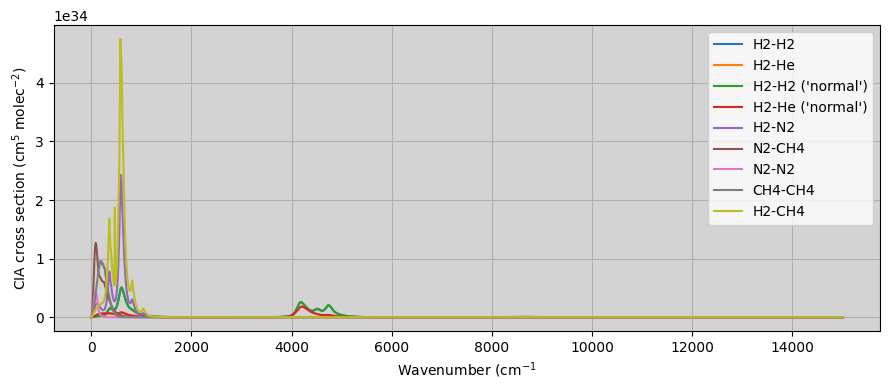

In [9]:
#Initialising the CIA class
########################################

CIA = ans.CIA_0()

#Reading the archNEMESIS input HDF5 file
####################################################

CIA.read_hdf5('input')  #Note that this reads the CIA tables directly

#Plotting the information
####################################################

CIA.plot_cia()